# Data Collection

In [1]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.getcwd()
#os.listdir()

'C:\\Users\\Admin\\Dropbox\\Rory\\01 - Development\\Data Science\\Springboard\\Career Track\\Capstone Projects\\Fantasy NFL\\01 Data Wrangling'

In [3]:
path = 'League Station - NFL Player Data 2015-2018.xlsx'
df1 = pd.read_excel(path, 'Data')
#df1.head()

In [4]:
df1.shape

(19004, 40)

In [5]:
path2 = 'League Station - NFL Player Data 2019.xlsx'
df2 = pd.read_excel(path2, 'Data')
#df2.tail()

In [6]:
df2.shape

(4711, 40)

### Appending Data Frames

In [7]:
df = df1.append(df2)

In [8]:
df.shape

(23715, 40)

### Column Matching

Running for loop to see if all columns in df1 match with columns in df2.

In [9]:
df1_cols = list(df1.columns)
df2_cols = list(df2.columns)

# Checking to see if all column names match
i = 0
for col in df1_cols:
    if col == df2_cols[i]:
        i = i + 1
        continue
    else:
        print(str(i) + ' is a mismatch')
        i = i + 1

# Data Organisation

Added library to GitHub to save resources - https://github.com/grizzler88/Springboard/tree/master/Capstone%20-%20Fantasy%20Draft%20Strategy 


##### Question
Does it makes more sense to link directly to GitHub for data and updating Juypter file or continue to progress on local environment?

# Data Definition

In [10]:
#df.info()

Reviewing data types shows that 'SEASON' is a 'int' data type although we will be using it as categorical variable. 

Below is to convert this column into a string value.

In [11]:
df['SEASON'] = df['SEASON'].astype(str)

#### Question

Should you change numeric data types to be all either float or int? Quick scan says this should not be an issue and to leave values in 'int' if at possible from performance point of view - is this correct?

In [12]:
#df.dtypes

# Data Cleaning

In [13]:
df.describe()

,FAN PTS,PASSCOMP,PASSATT,PASSCOMP%,PASSYDS,PASSTD,INT,QBRAT,SACK,SACKYDS,RUSHATT,RUSHYDS,RUSHTD,TGTS,REC,RECYDS,RECTD,FUM,FUMLST
count,23715.000000,23715.000000,23715.000000,23715.000000,23715.000000,23715.000000,23715.000000,23715.000000,23715.00000,23715.000000,23715.000000,23715.000000,23715.000000,23715.000000,23715.000000,23715.000000,23715.000000,23715.000000,23715.000000
mean,7.019907,2.391061,3.778705,0.079401,27.215475,0.169218,0.088973,11.286629,0.25486,1.685009,2.834662,11.977820,0.087455,3.561923,2.390217,27.211933,0.169218,0.115370,0.055113
std,7.459098,7.033341,10.999139,0.217173,80.797312,0.615230,0.397251,31.379713,0.91102,6.313321,5.317517,25.532093,0.333443,3.411787,2.327447,32.063177,0.425822,0.376323,0.242538
min,-10.200000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-23.000000,0.000000,0.000000,0.000000,-16.000000,0.000000,0.000000,0.000000
25%,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,4.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,16.000000,0.000000,0.000000,0.000000
75%,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,11.000000,0.000000,6.000000,4.000000,41.000000,0.000000,0.000000,0.000000
max,58.300000,45.000000,68.000000,1.000000,517.000000,7.000000,6.000000,158.300000,11.00000,72.000000,38.000000,238.000000,4.000000,23.000000,17.000000,300.000000,4.000000,4.000000,3.000000


In [14]:
for col in df:
    print(col + ' = ' + str(df[col].nunique()))

POS = 22
PLAYER = 1760
FAN PTS = 2278
TEAM = 32
HC = 63
OC = 76
DC = 62
H/A = 2
OPP = 32
OPP HC = 63
OPP OC = 76
OPP DC = 62
DATE = 251
SEASON = 5
WEEK = 17
MONTH = 5
DAY = 4
TIME = 5
ROOF = 2
SURFACE = 2
W/L = 3
SCORE = 972
PASSCOMP = 46
PASSATT = 67
PASSCOMP% = 397
PASSYDS = 443
PASSTD = 8
INT = 7
QBRAT = 1001
SACK = 12
SACKYDS = 70
RUSHATT = 38
RUSHYDS = 207
RUSHTD = 5
TGTS = 24
REC = 18
RECYDS = 220
RECTD = 5
FUM = 5
FUMLST = 4


## 'POS' Column Clean

This looks to have more variables than expected. Will look to understand what is included here and change if necessary.

In [15]:
#df['POS'].unique()

In [16]:
df['POS'].value_counts()

WR    9197
RB    6416
TE    4352
QB    3015
FB     537
P       81
S       22
DT      16
CB      16
T       11
K       11
LB       8
DE       7
OT       5
G        5
LT       4
C        3
DB       3
FS       2
OL       2
LS       1
DL       1
Name: POS, dtype: int64

In [17]:
mapping = {'QB':'QB', 'RB':'RB', 'FB':'RB','WR':'WR', 'TE':'TE','P':'OTH','S':'OTH','DT':'OTH','CB':'OTH', 
           'K':'OTH','T':'OTH', 'LB':'OTH', 'DE':'OTH', 'OT':'OTH', 'G':'OTH', 'LT':'OTH', 'C':'OTH',
          'DB':'OTH', 'FS':'OTH', 'OL':'OTH','DL':'OTH','LS':'OTH'}


df['POS_AGG'] = df['POS'].replace(mapping)
#df['POS_AGG'].unique()

In [18]:
df['POS_AGG'].value_counts()

WR     9197
RB     6953
TE     4352
QB     3015
OTH     198
Name: POS_AGG, dtype: int64

In [19]:
df.shape

(23715, 41)

## Object For Loop

Ended up using this for loop throughout process so turned into a function to make it easier to access.

##### Question
Is there already a built-in function that does this already?

In [20]:
def object_col(df):

    '''
    This fucntion prints all columns that are object data types
    '''

    for col in df:
        if df[col].dtypes == 'object':
            print(col)
        else:
            continue

In [21]:
#object_col(df)

## 'PLAYER' column clean

Look at 'PLAYER' column to understand how it is structured and what adjustments are needed.

In [22]:
list(df['PLAYER'].unique())[0]

'Aaron Rodgers GNB - QB'

Split column with results in new column 'PLAYER_SPLIT'

In [23]:
df['PLAYER_SPLIT'] = df['PLAYER'].str.split()
#df['PLAYER_SPLIT']

Create new column 'PLAYER_SPLIT_LEN' to show how many indexes are in split. Then apply value_counts() to understand how best to transform into new fields you want.

In [24]:
PLAYER_SPLIT_LEN = []
for split in df['PLAYER_SPLIT']:
    no = len(split)
    PLAYER_SPLIT_LEN.append(no)
    
df['PLAYER_SPLIT_LEN'] = PLAYER_SPLIT_LEN
df['PLAYER_SPLIT_LEN'].value_counts()

5    23690
6       25
Name: PLAYER_SPLIT_LEN, dtype: int64

Create FOR loop to run through 'PLAYER_SPLIT' and based on length of split, decide how to assign to new name, team or position list. These lists are then assigned to Data Serieis in DataFrame.

##### Question
Is there a way to assign these values directly to dataframe? I'm presuming there is a more efficient way to do this but didn't spring to mind.

Also, it looks like list got assigned in correct order but will this always be true? Is there a risk of using this method and assigning data in incorrect order?

In [25]:
new_name = []
new_team = []
new_position = []
for split in df['PLAYER_SPLIT']:
    if len(split) == 6:
        name = split[0] + ' ' + split[1] + ' ' + split[2]
        team = split[3]
        position = split[5]
        new_name.append(name)
        new_team.append(team)
        new_position.append(position)
    elif len(split) == 5:
        name = split[0] + ' ' + split[1]
        team = split[2]
        position = split[4]
        new_name.append(name)
        new_team.append(team)
        new_position.append(position)
    else:
        name = 'Unknown'
        team = 'N/A'
        position = 'N/A'
        new_name.append(name)
        new_team.append(team)
        new_position.append(position)

df['PLAYER_NAME'] = new_name
df['TEAM_ABV'] = new_team
df['POS_CHECK'] = new_position
#df.head()

Checking to make sure correct values got assigned with player names with lenght of 6.

In [26]:
#df[df['PLAYER_SPLIT_LEN'] == 6]

Dropping 'PLAYER', 'PLAYER_SPLIT' and 'PLAYER_SPLIT_LEN' columns as no longer needed.

In [27]:
df.drop(columns=['PLAYER', 'PLAYER_SPLIT_LEN', 'PLAYER_SPLIT'], inplace=True)
#df.head()

Checking to make sure positions columns match and dropping one column if duplicate.

In [28]:
(df['POS'] == df['POS_CHECK']).value_counts()

True    23715
dtype: int64

In [29]:
df.drop(columns=['POS_CHECK'], inplace=True)
#df.head()

## 'TEAM' Column Clean

In [30]:
#object_col(df)

Looking at two fields for team name shows that one has 32 uniques values vs 33. This is because the 'Chargers' moved from San Diego to LA in 2019 causing there to be a different 3-letter abbreviation in those years 'SDG' vs 'LAC'.

While OCD-tendency makes me want to correct this and have full team names and correct abbreviation codes for all teams, in the interest of time efficiency, I have decided to drop 'TEAM_ABV' column and use 'TEAM' going forward.

In [31]:
list(df['TEAM'].unique())
df['TEAM'].nunique()

32

In [32]:
list(df['TEAM_ABV'].unique())
df['TEAM_ABV'].nunique()

33

In [33]:
team_test = df['TEAM'] + ' - ' + df['TEAM_ABV']
#list(team_test.unique())

In [34]:
df.drop(columns='TEAM_ABV', inplace=True)
#df.head()

Checking 'OPP' column too to see if similar to 'TEAM'. It is so not going make any changes.

In [35]:
list(df['OPP'].unique())
df['OPP'].nunique()

32

## Date and Stadium columns cleans

These columns seem fine for the moment. Only changes may want to add are:

Week columns - change these to numerical

Year columns - pull these from date fields

Also, thought crossed mind about how do we account for BYE weeks for players but can comeback to this at later point if needed by analysis.

In [36]:
#object_col(df)

In [37]:
df['DATE']

0      2018-12-30
1      2018-12-30
2      2018-12-30
3      2018-12-30
4      2018-12-30
          ...    
4706   2019-09-08
4707   2019-09-09
4708   2019-09-08
4709   2019-09-08
4710   2019-09-08
Name: DATE, Length: 23715, dtype: datetime64[ns]

In [38]:
list(df['SEASON'].unique())

['2018', '2017', '2016', '2015', '2019']

In [39]:
list(df['MONTH'].unique())

['December', 'November', 'October', 'September', 'January']

In [40]:
list(df['WEEK'].unique())

['Week17',
 'Week16',
 'Week15',
 'Week14',
 'Week13',
 'Week12',
 'Week11',
 'Week10',
 'Week09',
 'Week08',
 'Week07',
 'Week06',
 'Week05',
 'Week04',
 'Week03',
 'Week02',
 'Week01']

In [41]:
list(df['DAY'].unique())

['Sunday', 'Saturday', 'Monday', 'Thursday']

In [42]:
list(df['TIME'].unique())

['Noon', 'Afternoon', 'Night', 'London', 'Mexico']

In [43]:
list(df['ROOF'].unique())

['Open', 'Dome']

In [44]:
list(df['SURFACE'].unique())

['Grass', 'Turf']

## 'SCORE' column clean

In [45]:
list(df['SCORE'].unique())
df['SCORE_SPLIT'] = df['SCORE'].str.split('-')

score_for = []
score_against = []
for split in df['SCORE_SPLIT']:
    pts_for = split[0]
    pts_agt = split[1]
    score_for.append(pts_for)
    score_against.append(pts_agt)

df['PTS_FOR'] = score_for
df['PTS_AGT'] = score_against

df['PTS_FOR'] = df['PTS_FOR'].astype('int')
df['PTS_AGT'] = df['PTS_AGT'].astype('int')

#df.dtypes
#df.head()

In [46]:
df.drop(columns=['SCORE_SPLIT', 'SCORE'], inplace=True)

In [47]:
#df.info()

## Null Value Check

Looking to see columns have null values. Dataset is clean.

In [48]:
df.isnull().values.any()

False

In [49]:
nas = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] == 0
#nas[pos]

## Calculate correct Fantasy Points

This fantasy football league has different scoring system to one applied in dataset. We need to create new fields to accurately calculate the fantasy points for each row of data. See below the scoring system.

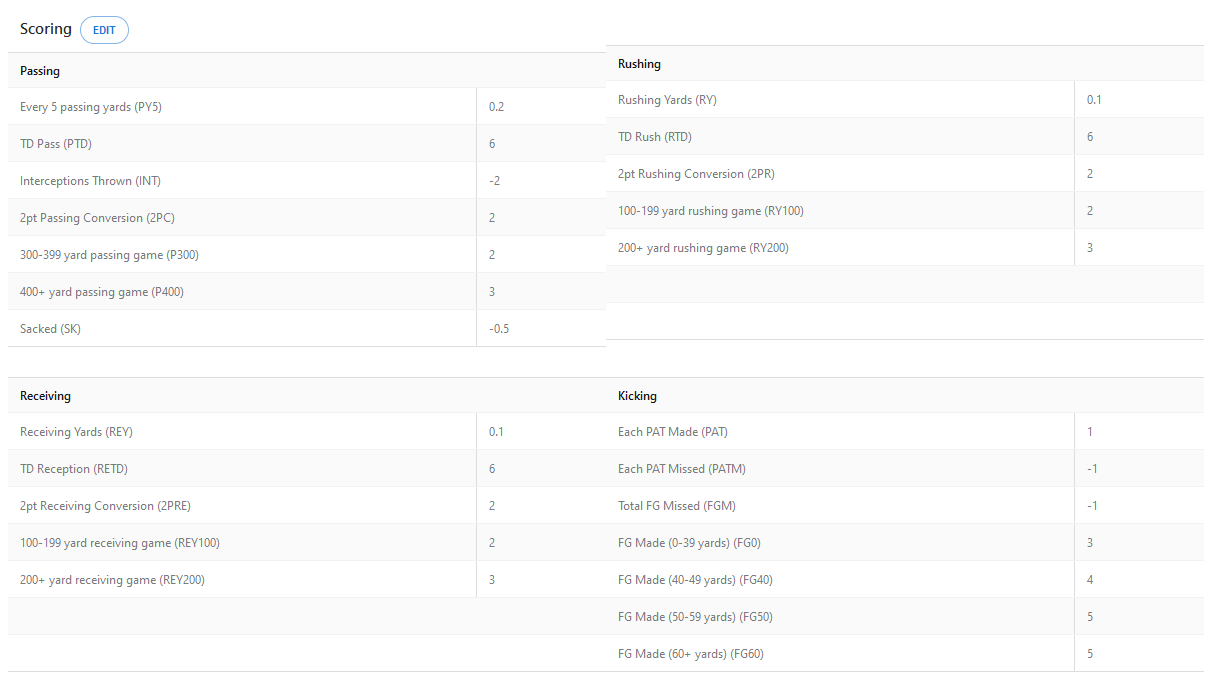

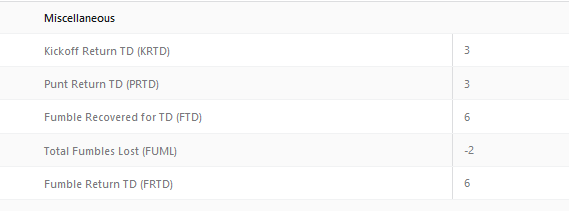

Defense and Kickers are not included in dataset so we will not look to calculate these statistics. 

Note: How can we include Defense and Kicker data for future analysis?

##### Passing Fantasy point calculations

In [50]:
# Passing Fantasy point calculations
df['FAN_PASSYDS'] = (df['PASSYDS']/5)*0.2
df['FAN_PASSTD'] = df['PASSTD']*6
df['FAN_PASSYDS_300'] = df['PASSYDS'].apply(lambda x: 2 if x >= 300 else 0)
df['FAN_PASSYDS_400'] = df['PASSYDS'].apply(lambda x: 1 if x >= 400 else 0)
df['FAN_INT'] = df['INT']*-2
df['FAN_SACK'] = df['SACK']*-0.5
df['FAN_PASS_TOT'] = df[['FAN_PASSYDS', 'FAN_PASSTD', 'FAN_PASSYDS_300', 'FAN_PASSYDS_400', 'FAN_INT', 'FAN_SACK']].sum(axis=1)

#df[['PLAYER_NAME', 'PASSYDS', 'FAN_PASSYDS', 'POS_AGG'== 'QB']].head()

#df[df['POS_AGG'] == 'QB'].head()

##### Rushing Fantasy point calculations

In [51]:
df['FAN_RUSHYDS'] = df['RUSHYDS']*0.1
df['FAN_RUSHTD'] = df['RUSHTD']*6
df['FAN_RUSHYDS_100'] = df['RUSHYDS'].apply(lambda x: 2 if x >= 100 else 0)
df['FAN_RUSHYDS_200'] = df['RUSHYDS'].apply(lambda x: 1 if x >= 200 else 0)
df['FAN_FUMLST'] = df['FUMLST']*-2
df['FAN_RUSH_TOT'] = df[['FAN_RUSHYDS', 'FAN_RUSHTD', 'FAN_RUSHYDS_100', 'FAN_RUSHYDS_200', 'FAN_FUMLST']].sum(axis=1)

#df[df['POS_AGG'] == 'RB'].head()

##### Receiving Fantasy point calculations

In [52]:
df['FAN_RECYDS'] = df['RECYDS']*0.1
df['FAN_RECTD'] = df['RECTD']*6
df['FAN_RECYDS_100'] = df['RECYDS'].apply(lambda x: 2 if x >= 100 else 0)
df['FAN_RECYDS_200'] = df['RECYDS'].apply(lambda x: 1 if x >= 200 else 0)
df['FAN_REC_TOT'] = df[['FAN_RECYDS', 'FAN_RECTD', 'FAN_RECYDS_100', 'FAN_RECYDS_200']].sum(axis=1)

#df[df['POS_AGG'] == 'WR'].head()

##### Total Fantasy points

In [53]:
df['FAN_TOT'] = df[['FAN_PASS_TOT', 'FAN_RUSH_TOT', 'FAN_REC_TOT']].sum(axis=1)

df[['PLAYER_NAME', 'POS_AGG', 'FAN_PASS_TOT', 'FAN_RUSH_TOT', 'FAN_REC_TOT', 'FAN_TOT']].sample(n=10)

,PLAYER_NAME,POS_AGG,FAN_PASS_TOT,FAN_RUSH_TOT,FAN_REC_TOT,FAN_TOT
15727,Vincent Jackson,WR,0.0,0.0,8.7,8.7
6953,Orleans Darkwa,RB,0.0,7.0,1.8,8.8
223,Nick Vannett,TE,0.0,0.0,1.7,1.7
7474,Theo Riddick,RB,0.0,2.1,2.4,4.5
8282,Travis Benjamin,WR,0.0,1.4,1.8,3.2
5266,Stevan Ridley,RB,0.0,2.8,0.0,2.8
10306,Paul Perkins,RB,0.0,5.6,0.0,5.6
89,DeVante Parker,WR,0.0,0.0,15.7,15.7
5786,Lawrence Thomas,OTH,0.0,0.0,0.7,0.7
14688,Jonathan Krause,WR,0.0,0.0,0.7,0.7


##### Dropping original 'FAN PTS' column as no longer required

In [54]:
df.drop(columns='FAN PTS', inplace=True)

# Output data to CSV

In [55]:
df.shape

(23715, 60)

In [56]:
df.to_csv('NFL_FantasyData_2015_2019.csv')